In [2]:
%matplotlib inline

import wave
import aubio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [93]:
def get_pitch_stats(signal: np.ndarray, fs: int, block_size: int, hop: int, tolerance: float = 0.2,
                    algorithm = 'yinfft') -> dict:
    """
    Get basic statistic on pitch in the given signal
    :param signal: 1-d signal
    :param fs: sampling frequency
    :param block_size: window size
    :param hop: size of a hop between frames
    :param tolerance:  tolerance for the pitch detection algorithm (for aubio)
    :return:
    """
    pitch_o = aubio.pitch(algorithm, block_size, hop, fs)
    pitch_o.set_unit('Hz')
    pitch_o.set_tolerance(tolerance)
    signal_win = np.array_split(signal, np.arange(hop, len(signal), hop))

    pitch_array = []
    for frame in signal_win[:-1]:
        pitch = pitch_o(frame)[0]
        confidence = pitch_o.get_confidence()
        print(pitch, confidence)
        if pitch > 0:
            pitch_array.append(pitch)

    if pitch_array:
        pitch_array = np.array(pitch_array)
        Q25, Q50, Q75 = np.quantile(pitch_array, [0.25, 0.5, 0.75])
        IQR = Q75 - Q25
        median = np.median(pitch_array)
    else:
        Q25 = 0
        Q50 = 0
        Q75 = 0
        median = 0
        IQR = 0

    pitchstats = {
        'pitch_median': median,
        'pitch_Q25': Q25,
        'pitch_Q75': Q75,
        'pitch_IQR': IQR
    }

    return pitchstats

In [5]:
wavread = wave.open(path, mode='rb') 
fs = wavread.getframerate()
start = int(start_s * fs)
end = int(end_s * fs)
sample_len = end - start
wavread.setpos(start)
wav_bytes = wavread.readframes(sample_len)
wav_array = np.frombuffer(wav_bytes, dtype=dtype)

NameError: name 'dtype' is not defined

In [6]:
if wavread.getsampwidth() == 2:
    dtype = 'int16'
elif wavread.getsampwidth() == 4:
    dtype = 'int32'
else:
    raise NotImplemented('I give up!')

2

In [ ]:
np.frombuffer()

In [3]:
path = '../data/raw/samples/STHELENA-02_20140605_200000_1.wav'
start_s = 89.36
end_s = 89.56
fs, X = wavfile.read(path)
sample = X[int(start_s * fs): int(end_s * fs)]

In [94]:
s = sample / (2**15 - 1)
p = get_pitch_stats(s.astype('float32'), fs, 512, 128, tolerance=0.4)
p

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1252.8036 0.0
1249.2765 0.0
1237.6617 0.0
1237.9026 0.0
0.0 0.0
3291.5073 0.6054214239120483
3044.037 0.7043166160583496
1410.8394 0.7516746520996094
1356.8446 0.6281684637069702
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


{'pitch_median': 1304.8241,
 'pitch_Q25': 1246.4330139160156,
 'pitch_Q75': 1819.1387939453125,
 'pitch_IQR': 572.7057800292969}

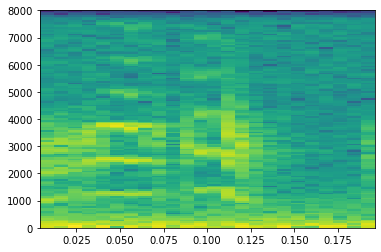

In [86]:
_ = plt.specgram(sample, NFFT=256, Fs=fs)

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1252.8036 0.0
1249.2765 0.0
1237.6617 0.0
1237.9026 0.0
0.0 0.0
3291.5073 0.6054214239120483
3044.037 0.7043166160583496
1410.8394 0.7516746520996094
1356.8446 0.6281684637069702
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


array([2700.3276  , 2786.5168  , 1027.0936  , 1041.1729  , 3110.4546  ,
       3270.7344  , 1252.8036  , 1249.2765  , 1237.6617  , 1237.9026  ,
       1224.0204  , 3291.5073  , 3044.037   , 2870.0188  , 3195.488   ,
       3265.927   , 3227.9688  , 3110.615   ,  105.255585,  120.22038 ,
         64.60435 ], dtype=float32)